# Gamer study : Single subject EEG Pre-processing


`
Created on Sun Dec 4 2019

Author: Francois R. Foerster
`

In [49]:
# Use MNE
%matplotlib qt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import mne
from mne.event import define_target_events

#### Load a dataset

In [50]:
nameFile = input("Please enter a name: ")
myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/RawData/' + nameFile + '.bdf'
raw = mne.io.read_raw_bdf(myPath, montage = 'deprecated', preload=True)
print(raw.info)

Please enter a name: sub7
Extracting EDF parameters from /Users/francoisfoerster/Documents/GamerLocalAnalysis/RawData/sub7.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9469951  =      0.000 ...  4624.000 secs...
<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | A1, A2, A3, A4, A5, A6, A7, A8, A9, ...
    chs : list | 80 items (EEG: 79, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 417.0 Hz
    meas_date : tuple | 2020-01-24 15:39:02 GMT
    nchan : int | 80
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 2048.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
 

### Re-referencing the signal to the left- / right-ears

In [51]:
raw.set_eeg_reference(['EXG1', 'EXG2'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawEDF  |  sub7.bdf, n_channels x n_times : 80 x 9469952 (4624.0 sec), ~5.64 GB, data loaded>

### Drop unused channels

In [52]:
raw.drop_channels(['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6','EXG7','EXG8',
                       'GSR1','GSR2','Erg1','Erg2', 'Resp', 'Plet', 'Temp'])

<RawEDF  |  sub7.bdf, n_channels x n_times : 65 x 9469952 (4624.0 sec), ~4.59 GB, data loaded>

### Rename the channels

In [53]:
mapping = {'A1': 'Fp1', 'A2': 'AF7','A3': 'AF3','A4': 'F1',
'A5': 'F3','A6': 'F5','A7': 'F7','A8': 'FT7','A9': 'FC5',
'A10': 'FC3','A11': 'FC1','A12': 'C1','A13': 'C3','A14': 'C5',
'A15': 'T7','A16': 'TP7','A17': 'CP5','A18': 'CP3','A19': 'CP1',
'A20': 'P1','A21': 'P3','A22': 'P5','A23': 'P7','A24': 'P9',
'A25': 'PO7','A26': 'PO3','A27': 'O1','A28': 'Iz','A29': 'Oz',
'A30': 'POz','A31': 'Pz','A32': 'CPz','B1': 'Fpz','B2': 'Fp2',
'B3': 'AF8','B4': 'AF4','B5': 'AFz','B6': 'Fz','B7': 'F2',
'B8': 'F4','B9': 'F6','B10': 'F8','B11': 'FT8','B12': 'FC6',
'B13': 'FC4','B14': 'FC2','B15': 'FCz','B16': 'Cz','B17': 'C2',
'B18': 'C4','B19': 'C6','B20': 'T8','B21': 'TP8','B22': 'CP6',
'B23': 'CP4','B24': 'CP2','B25': 'P2','B26': 'P4','B27': 'P6',
'B28': 'P8','B29': 'P10','B30': 'PO8','B31': 'PO4','B32': 'O2'}

mne.rename_channels(raw.info, mapping);                                       

### Specify the Montage Biosemi 64 channels


In [54]:
# Load the montage Biosemi 64 channels and set 10/20 electrode names
montage = mne.channels.make_standard_montage('biosemi64')

In [55]:
raw.set_montage(montage, raise_if_subset=False)

<RawEDF  |  sub7.bdf, n_channels x n_times : 65 x 9469952 (4624.0 sec), ~4.59 GB, data loaded>

### Filtering

In [56]:
raw.filter(l_freq = 1, h_freq = 40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6759 samples (3.300 sec)



<RawEDF  |  sub7.bdf, n_channels x n_times : 65 x 9469952 (4624.0 sec), ~4.59 GB, data loaded>

In [57]:
# raw.plot(block=True)

### Extract events

In [58]:
events = mne.find_events(raw, stim_channel='Status',
                         initial_event=True, min_duration = 0.001)
events = mne.pick_events(events, include=[90, 67, 68, 69,74, 75, 76, 77, 78, 70, 71, 72, 73, 109, 105, 106, 107, 108, 120, 121, 122, 110, 111, 112, 113, 115, 116, 117, 118], )

print('------')
# Show all unique event codes (3rd column)
print('Unique event codes selected:\n ----\n', np.unique(events[:, 2],
                            return_counts=True),'\n -----------------')


12767 events found
Event IDs: [   65    66    67    68    70    71    72    73    74    75    76    77
    78    80    81    82    83    84    85    86    87    88    89    90
   100   101   102   103   104   105   106   107   108   109   110   111
   112   113   120   121   122   235 65536]
------
Unique event codes selected:
 ----
 (array([ 67,  68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  90, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 120, 121, 122]), array([  24,  989,  124,  119,  124,  118,  128,  120,  123,  115,   13,
       2217,  504,  376,  376,  128,  994,  229,  275,  476,    3,  380,
        485,  480])) 
 -----------------


##  Recode the events of the VFP task
Here, we recode the event representing the onset of the grey light (121) and include the conditions with the codes below:
#### Temporal short (70) = 1000   Temporal long (71) = 2000
#### Neutral short (72) = 3000       Neutral long (73) = 4000
#### SS = 100    LS = 200    LL = 300    SL = 400
#### Training trials = -10000

In [59]:
array = [0]

for indOnsetEvent, onsetEvent in enumerate(events[:, 2] ): # look at the markers within the trial    
    #print('Look for Onset', indOnsetEvent, onsetEvent)
    
    if onsetEvent == 121: # the event to re-code
        #print('- Found Onset',indOnsetEvent, onsetEvent)
        events[indOnsetEvent,2] = 0
        
        for idx, eventCondition in enumerate(events[indOnsetEvent:, 2]):
            #print('    Look for Conditions, now at ', indOnsetEvent+idx, 'is', eventCondition, ' new code', events[indOnsetEvent, 2]) 

            if eventCondition == 70:
                
                events[indOnsetEvent,2] += 1000 #'_Tshort'
                
                if array[-1] == 1000 or array[-1] == 1100 or array[-1] == 1200:
                    events[indOnsetEvent,2] += 100 # 'SS'
                elif array[-1] == 2000 or array[-1] == 2300 or array[-1] == 2400:
                    events[indOnsetEvent,2] += 200 # 'LS'
                    
                    
            elif eventCondition == 71:
                
                events[indOnsetEvent,2] += 2000 #'_Tlong'
                if array[-1] == 2000 or array[-1] == 2300 or array[-1] == 2400:
                    events[indOnsetEvent,2] += 300 # 'LL'
                elif array[-1] == 1000 or array[-1] == 1100 or array[-1] == 1200:
                    events[indOnsetEvent,2] += 400 # 'SL'
                
                
            elif eventCondition == 72:
                
                events[indOnsetEvent,2] += 3000 #'_Nshort'
                
                if array[-1] == 3000 or array[-1] == 3100 or array[-1] == 3200:
                    events[indOnsetEvent,2] += 100 # 'SS'
                elif array[-1] == 4000 or array[-1] == 4300 or array[-1] == 4400:
                    events[indOnsetEvent,2] += 200 # 'LS'
                   
                
            elif eventCondition == 73:
                
                events[indOnsetEvent,2] += 4000 #'_Nlong'
                
                if array[-1] == 4000 or array[-1] == 4300 or array[-1] == 4400:
                    events[indOnsetEvent,2] += 300 # 'LL'
                elif array[-1] == 3000 or array[-1] == 3100 or array[-1] == 3200:
                    events[indOnsetEvent,2] += 400 # 'SL'
            
                
            elif eventCondition == 67:
                events[indOnsetEvent,2] -= 10000 # training to remove
                
                
            elif eventCondition == 120 or eventCondition == 109: # beginning of the next trial is the end of the current trial
                break
        
        array.append(events[indOnsetEvent,2]) # add to the list the condition
        
#print('---------- /n', len(array), '---------- /n',array)

del array


##  Recode the events of the Asynchrony task
Here, we recode the event representing the first red light (106 or 108) and include the conditions with the codes below:
#### Stimulus left (106)   Stimulus right (107) - not re-tagged
#### Condition: Synchrone (74) = 5000 | Delay 11 ms (75) = 6000 | Delay 33 ms (76) = 7000 | Delay 66 ms (76) = 8000 
#### Error of onsets = 9000
#### Laterality effect: RR = 10 | LL = 20 | RL = 30 | LR = 40
#### Response Synchrone (110) = 1          Response Asynchrone (111) = 2
#### Training trials = -10000

In [60]:
array = ['X'] # Used to detect laterality effect between two succesive trials
time = 0

for indFirstStim, firstStim in enumerate(events[:, 2] ): # look for the first stimulus
    print('Look for 1st Stim', indOnsetEvent, firstStim)
    
    if firstStim == 108 or firstStim == 106 or firstStim == 107: # the event to re-code
        print('- Found 1st Stim',indFirstStim, firstStim)
        events[indFirstStim,2] = 0
        
        if firstStim == 108:
            events[indFirstStim,2] += 5000 # 'Sync'
            array.append('X')
            
            for indSecondStim, secondStim in enumerate(events[indFirstStim:, 2] ): # look for the response
                print('--- Look for the response',indFirstStim+indSecondStim, secondStim)
                                
                if firstStim == 67:
                     events[indFirstStim,2] -= 10000 # training to remove
                        
                if secondStim == 110:
                    events[indFirstStim,2] += 1 # Response Sync
                    print('----- Found response',indFirstStim+indSecondStim, secondStim)
                    break
                if secondStim == 111:
                    events[indFirstStim,2] += 2 # Response Async
                    print('----- Found response',indFirstStim+indSecondStim, secondStim)
                    break
                    
            
        elif firstStim == 106: # 'Async' with first stimulus on the left hemisfield
            array.append('L')
            if array[-2] == 'L':
                events[indFirstStim,2] += 20
            elif array[-2] == 'R':
                events[indFirstStim,2] += 40 
            
            for indSecondStim, secondStim in enumerate(events[indFirstStim:, 2] ): # look for the second stimulus
                print('--- Look for 2st Stim',indFirstStim+indSecondStim, secondStim)
                                
                if firstStim == 67:
                     events[indFirstStim,2] -= 10000 # training to remove
                        
                if secondStim == 107:
                    print('----- Found 2nd Stim',indFirstStim+indSecondStim, secondStim)
                    time = (events[indFirstStim+indSecondStim, 0] - events[indFirstStim, 0]) * (1/raw.info['sfreq']) # calculate time between the two onsets

                    if 0.009 <= abs(time) <= 0.014: # approx. 11 ms delay
                        events[indFirstStim,2] += 6000 
                    elif 0.030 <= abs(time) <= 0.036: # approx. 33 ms delay
                        events[indFirstStim,2] += 7000  
                    elif 0.063 <= abs(time) <= 0.069: # approx. 66 ms delay
                        events[indFirstStim,2] += 8000
                    else:
                        events[indFirstStim,2] += 9000 # Error of onsets
                        
                    print('# Time: ',time, 'Diff of sample:',events[indFirstStim+indSecondStim, 0] - events[indFirstStim, 0],'\n# with 2nd Stim or response', events[indFirstStim+indSecondStim, ], ' and 1st Stim', events[indFirstStim, ])


                if secondStim == 110:
                    events[indFirstStim,2] += 1 # Response Sync
                    break
                if secondStim == 111:
                    events[indFirstStim,2] += 2 # Response Async
                    break
                
        elif firstStim == 107: # 'Async' with first stimulus on the right hemisfield
            array.append('R')
            if array[-2] == 'L':
                events[indFirstStim,2] += 30
            elif array[-2] == 'R':
                events[indFirstStim,2] += 10 
                
            for indSecondStim, secondStim in enumerate(events[indFirstStim:, 2] ): # look for the second stimulus
                print('--- Look for 2st Stim or Response',indFirstStim+indSecondStim, secondStim)
                
                if firstStim == 67:
                     events[indFirstStim,2] -= 10000 # training to remove
                        
                if secondStim == 106:
                    print('----- Found 2nd Stim',indFirstStim+indSecondStim, secondStim)
                    time = (events[indFirstStim+indSecondStim, 0] - events[indFirstStim, 0]) * (1/raw.info['sfreq']) # calculate time between the two onsets
                    
                    if 0.009 <= abs(time) <= 0.014: # approx. 11 ms delay
                        events[indFirstStim,2] += 6000 
                    elif 0.030 <= abs(time) <= 0.036: # approx. 33 ms delay
                        events[indFirstStim,2] += 7000  
                    elif 0.063 <= abs(time) <= 0.069: # approx. 66 ms delay
                        events[indFirstStim,2] += 8000 
                    else:
                        events[indFirstStim,2] += 9000 # Error of onsets
                        
                    print('# Time: ',time, 'Diff of sample:',events[indFirstStim+indSecondStim, 0] - events[indFirstStim, 0],'\n# with 2nd Stim or response', events[indFirstStim+indSecondStim, ], ' and 1st Stim', events[indFirstStim, ])

                        
                if secondStim == 110:
                    events[indFirstStim,2] += 1 # Response Sync
                    break
                if secondStim == 111:
                    events[indFirstStim,2] += 2 # Response Async
                    break
                
            

        
#print('---------- /n', len(array), '---------- /n',array)

print('Unique event codes selected:\n ----\n', np.unique(events[:, 2],
                            return_counts=True),'\n -----------------')

del array

Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 4 108
--- Look for the response 4 5000
--- Look for the response 5 67
--- Look for the response 6 68
--- Look for the response 7 110
----- Found response 7 110
Look for 1st Stim 8919 67
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 108
- Found 1st Stim 12 108
--- Look for the response 12 5000
--- Look for the response 13 74
--- Look for the response 14 67
--- Look for the response 15 68
--- Look for the response 16 110
----- Found response 16 110
Look for 1st Stim 8919 74
Look for 1st Stim 8919 67
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 19 107
--- Look for 2st Stim or Response 19 0
--- Look for 2

# Time:  0.01123046875 Diff of sample: 23 
# with 2nd Stim or response [224138      0    107]  and 1st Stim [224115      0   6020]
--- Look for 2st Stim 187 76
--- Look for 2st Stim 188 67
--- Look for 2st Stim 189 68
--- Look for 2st Stim 190 110
Look for 1st Stim 8919 107
- Found 1st Stim 186 107
--- Look for 2st Stim or Response 186 30
--- Look for 2st Stim or Response 187 76
--- Look for 2st Stim or Response 188 67
--- Look for 2st Stim or Response 189 68
--- Look for 2st Stim or Response 190 110
Look for 1st Stim 8919 76
Look for 1st Stim 8919 67
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 193 106
--- Look for 2st Stim 193 40
--- Look for 2st Stim 194 107
----- Found 2nd Stim 194 107
# Time:  0.03369140625 Diff of sample: 69 
# with 2nd Stim or response [230120      0    107]  and 1st Stim [230051      0   7040]
--- Look for 2st Stim 195 75
--- Look for 2st Stim 196 67
--- Lo

Look for 1st Stim 8919 1100
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st S

Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1100
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2300
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Sti

Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1100
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 

Look for 1st Stim 8919 108
- Found 1st Stim 1551 108
--- Look for the response 1551 5000
--- Look for the response 1552 74
--- Look for the response 1553 68
--- Look for the response 1554 111
----- Found response 1554 111
Look for 1st Stim 8919 74
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 1557 107
--- Look for 2st Stim or Response 1557 0
--- Look for 2st Stim or Response 1558 106
----- Found 2nd Stim 1558 106
# Time:  0.033203125 Diff of sample: 68 
# with 2nd Stim or response [1468686       0     106]  and 1st Stim [1468618       0    7000]
--- Look for 2st Stim or Response 1559 74
--- Look for 2st Stim or Response 1560 68
--- Look for 2st Stim or Response 1561 111
Look for 1st Stim 8919 106
- Found 1st Stim 1558 106
--- Look for 2st Stim 1558 40
--- Look for 2st Stim 1559 74
--- Look for 2st Stim 1560 68
--- Look for 2st Stim 1561 111
Look for 1st Stim 8919 74
Look for 1st Sti

Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 1743 108
--- Look for the response 1743 5000
--- Look for the response 1744 76
--- Look for the response 1745 68
--- Look for the response 1746 110
----- Found response 1746 110
Look for 1st Stim 8919 76
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 1751 106
--- Look for 2st Stim 1751 0
--- Look for 2st Stim 1752 107
----- Found 2nd Stim 1752 107
# Time:  0.06640625 Diff of sample: 136 
# with 2nd Stim or response [1650258       0     107]  and 1st Stim [1650122       0    8000]
--- Look for 2st Stim 1753 74
--- Look for 2st Stim 1754 68
--- Look for 2st Stim 1755 111
Look for 1st Stim 8919 107
- Found 1st Stim 1752 107
--- Look for 2st Stim or Response 1752 30
--- Look for 2st Stim o

Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 1936 106
--- Look for 2st Stim 1936 40
--- Look for 2st Stim 1937 107
----- Found 2nd Stim 1937 107
# Time:  0.0107421875 Diff of sample: 22 
# with 2nd Stim or response [1820343       0     107]  and 1st Stim [1820321       0    6040]
--- Look for 2st Stim 1938 75
--- Look for 2st Stim 1939 68
--- Look for 2st Stim 1940 110
Look for 1st Stim 8919 107
- Found 1st Stim 1937 107
--- Look for 2st Stim or Response 1937 30
--- Look for 2st Stim or Response 1938 75
--- Look for 2st Stim or Response 1939 68
--- Look for 2st Stim or Response 1940 110
Look for 1st Stim 8919 75
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 1943 107
--- Look for 2st Stim or Response 1943 10
--- Look for 2st Stim or Response 1944 106
----- Found 2nd Stim 1944 106
# Time:  0.06640625 Diff of sample: 136 
# with 2nd Stim or response [1826280  

----- Found response 2121 110
Look for 1st Stim 8919 76
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 2124 107
--- Look for 2st Stim or Response 2124 0
--- Look for 2st Stim or Response 2125 106
----- Found 2nd Stim 2125 106
# Time:  0.01123046875 Diff of sample: 23 
# with 2nd Stim or response [1989292       0     106]  and 1st Stim [1989269       0    6000]
--- Look for 2st Stim or Response 2126 74
--- Look for 2st Stim or Response 2127 68
--- Look for 2st Stim or Response 2128 110
Look for 1st Stim 8919 106
- Found 1st Stim 2125 106
--- Look for 2st Stim 2125 40
--- Look for 2st Stim 2126 74
--- Look for 2st Stim 2127 68
--- Look for 2st Stim 2128 110
Look for 1st Stim 8919 74
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 2131 106
--- Look for 2st Stim 2131 20
--- Look for 2st

Look for 1st Stim 8919 90
Look for 1st Stim 8919 3000
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3100
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3100
Look for 1st Stim 8919 68
Look for 1st 

Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3100
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4300
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 

Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4300
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st S

- Found 1st Stim 3577 107
--- Look for 2st Stim or Response 3577 30
--- Look for 2st Stim or Response 3578 77
--- Look for 2st Stim or Response 3579 68
--- Look for 2st Stim or Response 3580 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 3585 108
--- Look for the response 3585 5000
--- Look for the response 3586 77
--- Look for the response 3587 68
--- Look for the response 3588 110
----- Found response 3588 110
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 3593 108
--- Look for the response 3593 5000
--- Look for the response 3594 74
--- Look for the response 3595 68
--- Look for the response 3596 110
----- Found response 

--- Look for 2st Stim or Response 3782 111
Look for 1st Stim 8919 106
- Found 1st Stim 3779 106
--- Look for 2st Stim 3779 40
--- Look for 2st Stim 3780 76
--- Look for 2st Stim 3781 68
--- Look for 2st Stim 3782 111
Look for 1st Stim 8919 76
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 3787 108
--- Look for the response 3787 5000
--- Look for the response 3788 76
--- Look for the response 3789 68
--- Look for the response 3790 110
----- Found response 3790 110
Look for 1st Stim 8919 76
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 3793 106
--- Look for 2st Stim 3793 0
--- Look for 2st Stim 3794 107
----- Found 2nd Stim 3794 107
# Time:  0.01171875 Diff of sample: 24 
# with 2nd Stim or response [3839217       0     107]  and 1

--- Look for 2st Stim or Response 3982 75
--- Look for 2st Stim or Response 3983 68
--- Look for 2st Stim or Response 3984 111
Look for 1st Stim 8919 106
- Found 1st Stim 3981 106
--- Look for 2st Stim 3981 40
--- Look for 2st Stim 3982 75
--- Look for 2st Stim 3983 68
--- Look for 2st Stim 3984 111
Look for 1st Stim 8919 75
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 3989 108
--- Look for the response 3989 5000
--- Look for the response 3990 77
--- Look for the response 3991 68
--- Look for the response 3992 110
----- Found response 3992 110
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 3997 107
--- Look for 2st Stim or Response 3997 0
--- Look for 

Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 4201 106
--- Look for 2st Stim 4201 0
--- Look for 2st Stim 4202 107
----- Found 2nd Stim 4202 107
# Time:  0.0673828125 Diff of sample: 138 
# with 2nd Stim or response [4221874       0     107]  and 1st Stim [4221736       0    8000]
--- Look for 2st Stim 4203 74
--- Look for 2st Stim 4204 68
--- Look for 2st Stim 4205 111
Look for 1st Stim 8919 107
- Found 1st Stim 4202 107
--- Look for 2st Stim or Response 4202 30
--- Look for 2st Stim or Response 4203 74
--- Look for 2st Stim or Response 4204 68
--- Look for 2st Stim or Response 4205 111
Look for 1st Stim 8919 74
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st

Look for 1st Stim 8919 78
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 4408 106
--- Look for 2st Stim 4408 20
--- Look for 2st Stim 4409 107
----- Found 2nd Stim 4409 107
# Time:  0.03369140625 Diff of sample: 69 
# with 2nd Stim or response [4421187       0     107]  and 1st Stim [4421118       0    7020]
--- Look for 2st Stim 4410 77
--- Look for 2st Stim 4411 68
--- Look for 2st Stim 4412 111
Look for 1st Stim 8919 107
- Found 1st Stim 4409 107
--- Look for 2st Stim or Response 4409 30
--- Look for 2st Stim or Response 4410 77
--- Look for 2st Stim or Response 4411 68
--- Look for 2st Stim or Response 4412 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1

Look for 1st Stim 8919 2400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2300
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1100
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st S

Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 70
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 2300
Look for 1st Stim 8919 68
Look for 1st Stim 8919 71
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 1200
Look for 1st Stim 8919 68
Look for 1st Stim

--- Look for 2st Stim or Response 5742 106
----- Found 2nd Stim 5742 106
# Time:  0.033203125 Diff of sample: 68 
# with 2nd Stim or response [6000483       0     106]  and 1st Stim [6000415       0    7010]
--- Look for 2st Stim or Response 5743 77
--- Look for 2st Stim or Response 5744 68
--- Look for 2st Stim or Response 5745 111
Look for 1st Stim 8919 106
- Found 1st Stim 5742 106
--- Look for 2st Stim 5742 40
--- Look for 2st Stim 5743 77
--- Look for 2st Stim 5744 68
--- Look for 2st Stim 5745 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 5750 107
--- Look for 2st Stim or Response 5750 30
--- Look for 2st Stim or Response 5751 106
----- Found 2nd Stim 5751 106
# Time:  0.03369140625 Diff of sample: 69 
# with 2nd Stim or response [6008349       0     106]  and 1st Stim [6008280       0    7030]
-

Look for 1st Stim 8919 107
- Found 1st Stim 5943 107
--- Look for 2st Stim or Response 5943 30
--- Look for 2st Stim or Response 5944 77
--- Look for 2st Stim or Response 5945 68
--- Look for 2st Stim or Response 5946 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 106
- Found 1st Stim 5951 106
--- Look for 2st Stim 5951 40
--- Look for 2st Stim 5952 107
----- Found 2nd Stim 5952 107
# Time:  0.0673828125 Diff of sample: 138 
# with 2nd Stim or response [6193333       0     107]  and 1st Stim [6193195       0    8040]
--- Look for 2st Stim 5953 76
--- Look for 2st Stim 5954 68
--- Look for 2st Stim 5955 111
Look for 1st Stim 8919 107
- Found 1st Stim 5952 107
--- Look for 2st Stim or Response 5952 30
--- Look for 2st Stim or Response 5953 76
--- Look for 2st Stim or Response 5954 68
--- Look for 2st Stim or Response 5955 111

Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 6145 107
--- Look for 2st Stim or Response 6145 0
--- Look for 2st Stim or Response 6146 106
----- Found 2nd Stim 6146 106
# Time:  0.06884765625 Diff of sample: 141 
# with 2nd Stim or response [6374180       0     106]  and 1st Stim [6374039       0    8000]
--- Look for 2st Stim or Response 6147 74
--- Look for 2st Stim or Response 6148 68
--- Look for 2st Stim or Response 6149 111
Look for 1st Stim 8919 106
- Found 1st Stim 6146 106
--- Look for 2st Stim 6146 40
--- Look for 2st Stim 6147 74
--- Look for 2st Stim 6148 68
--- Look for 2st Stim 6149 111
Look for 1st Stim 8919 74
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 6154 106
--- Look for 2st Stim 6154 20
--- Look for 2st Stim 6155 107
----- Found 2nd Stim 6155 107
# Time:  0.0673828125 Diff of sample: 

# with 2nd Stim or response [6563302       0     106]  and 1st Stim [6563234       0    7000]
--- Look for 2st Stim or Response 6351 74
--- Look for 2st Stim or Response 6352 68
--- Look for 2st Stim or Response 6353 111
Look for 1st Stim 8919 106
- Found 1st Stim 6350 106
--- Look for 2st Stim 6350 40
--- Look for 2st Stim 6351 74
--- Look for 2st Stim 6352 68
--- Look for 2st Stim 6353 111
Look for 1st Stim 8919 74
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 6358 107
--- Look for 2st Stim or Response 6358 30
--- Look for 2st Stim or Response 6359 106
----- Found 2nd Stim 6359 106
# Time:  0.0673828125 Diff of sample: 138 
# with 2nd Stim or response [6571282       0     106]  and 1st Stim [6571144       0    8030]
--- Look for 2st Stim or Response 6360 76
--- Look for 2st Stim or Response 6361 68
--- Look for 2st Stim or Respon

Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 6538 107
--- Look for 2st Stim or Response 6538 0
--- Look for 2st Stim or Response 6539 106
----- Found 2nd Stim 6539 106
# Time:  0.03369140625 Diff of sample: 69 
# with 2nd Stim or response [6738970       0     106]  and 1st Stim [6738901       0    7000]
--- Look for 2st Stim or Response 6540 74
--- Look for 2st Stim or Response 6541 68
--- Look for 2st Stim or Response 6542 111
Look for 1st Stim 8919 106
- Found 1st Stim 6539 106
--- Look for 2st Stim 6539 40
--- Look for 2st Stim 6540 74
--- Look for 2st Stim 6541 68
--- Look for 2st Stim 6542 111
Look for 1st Stim 8919 74
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 6545 107
--- Look for 2st Stim or Response 6545 30
--- Look for 2st Stim or Response 6546 106
----- Found 2nd Stim 6546 106
# Time:  0.0112

# with 2nd Stim or response [6940053       0     107]  and 1st Stim [6939915       0    8020]
--- Look for 2st Stim 6759 77
--- Look for 2st Stim 6760 68
--- Look for 2st Stim 6761 111
Look for 1st Stim 8919 107
- Found 1st Stim 6758 107
--- Look for 2st Stim or Response 6758 30
--- Look for 2st Stim or Response 6759 77
--- Look for 2st Stim or Response 6760 68
--- Look for 2st Stim or Response 6761 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 6768 106
--- Look for 2st Stim 6768 40
--- Look for 2st Stim 6769 107
----- Found 2nd Stim 6769 107
# Time:  0.0673828125 Diff of sample: 138 
# with 2nd Stim or response [6948747       0     107]  and 1st Stim [6948609       0    8040]
--- Look for 2st Stim 6770 77
--- Look for 2st Stim 6771 68
--- Look for 2s

Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4300
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3100
Look for 1st Stim 

Look for 1st Stim 8919 90
Look for 1st Stim 8919 4400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 4400
Look for 1st Stim 8919 68
Look for 1st Stim 8919 73
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 3200
Look for 1st Stim 8919 68
Look for 1st Stim 8919 72
Look for 1st Stim 8919 122
Look for 1st Stim 8919 112
Look for 1st Stim 8919 109
Look for 1st Stim 8919 120
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Sti

Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 8076 108
--- Look for the response 8076 5000
--- Look for the response 8077 76
--- Look for the response 8078 68
--- Look for the response 8079 111
----- Found response 8079 111
Look for 1st Stim 8919 76
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 106
- Found 1st Stim 8084 106
--- Look for 2st Stim 8084 0
--- Look for 2st Stim 8085 107
----- Found 2nd Stim 8085 107
# Time:  0.03369140625 Diff of sample: 69 
# with 2nd Stim or response [8666246       0     107]  and 1st Stim [8666177       0    7000]
--- Look for 2st Stim 8086 74
--- Look for 2st Stim 8087 68
--- Look for 2st Stim 8088 111
Look for 1st Stim 8919 107
- Found 1st Stim 8085 107
--- Look f

--- Look for 2st Stim or Response 8257 68
--- Look for 2st Stim or Response 8258 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 107
- Found 1st Stim 8261 107
--- Look for 2st Stim or Response 8261 10
--- Look for 2st Stim or Response 8262 106
----- Found 2nd Stim 8262 106
# Time:  0.03369140625 Diff of sample: 69 
# with 2nd Stim or response [8818249       0     106]  and 1st Stim [8818180       0    7010]
--- Look for 2st Stim or Response 8263 77
--- Look for 2st Stim or Response 8264 68
--- Look for 2st Stim or Response 8265 111
Look for 1st Stim 8919 106
- Found 1st Stim 8262 106
--- Look for 2st Stim 8262 40
--- Look for 2st Stim 8263 77
--- Look for 2st Stim 8264 68
--- Look for 2st Stim 8265 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 

Look for 1st Stim 8919 75
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 8445 108
--- Look for the response 8445 5000
--- Look for the response 8446 76
--- Look for the response 8447 68
--- Look for the response 8448 110
----- Found response 8448 110
Look for 1st Stim 8919 76
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 8453 108
--- Look for the response 8453 5000
--- Look for the response 8454 74
--- Look for the response 8455 68
--- Look for the response 8456 110
----- Found response 8456 110
Look for 1st Stim 8919 74
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
L

--- Look for 2st Stim 8638 77
--- Look for 2st Stim 8639 68
--- Look for 2st Stim 8640 110
Look for 1st Stim 8919 107
- Found 1st Stim 8637 107
--- Look for 2st Stim or Response 8637 30
--- Look for 2st Stim or Response 8638 77
--- Look for 2st Stim or Response 8639 68
--- Look for 2st Stim or Response 8640 110
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 8643 108
--- Look for the response 8643 5000
--- Look for the response 8644 75
--- Look for the response 8645 68
--- Look for the response 8646 110
----- Found response 8646 110
Look for 1st Stim 8919 75
Look for 1st Stim 8919 68
Look for 1st Stim 8919 110
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 8651 108
--- Look for the response 8651 5000
--- Look for the response 8652 74
--- Look for the respons

# Time:  0.03369140625 Diff of sample: 69 
# with 2nd Stim or response [9342772       0     107]  and 1st Stim [9342703       0    7040]
--- Look for 2st Stim 8837 77
--- Look for 2st Stim 8838 68
--- Look for 2st Stim 8839 111
Look for 1st Stim 8919 107
- Found 1st Stim 8836 107
--- Look for 2st Stim or Response 8836 30
--- Look for 2st Stim or Response 8837 77
--- Look for 2st Stim or Response 8838 68
--- Look for 2st Stim or Response 8839 111
Look for 1st Stim 8919 77
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1st Stim 8919 90
Look for 1st Stim 8919 105
Look for 1st Stim 8919 108
- Found 1st Stim 8844 108
--- Look for the response 8844 5000
--- Look for the response 8845 76
--- Look for the response 8846 68
--- Look for the response 8847 111
----- Found response 8847 111
Look for 1st Stim 8919 76
Look for 1st Stim 8919 68
Look for 1st Stim 8919 111
Look for 1st Stim 8919 109
Look for 1st Stim 8919 90
Look for 1s

In [61]:
fig = mne.viz.plot_events(events, raw.info['sfreq']);
print('Unique event codes selected:\n ----\n', np.unique(events[:, 2],
                            return_counts=True),'\n -----------------')

<ipython-input-61-3d0ff29606df>:1: RuntimeWarning: More events than colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, raw.info['sfreq']);


Unique event codes selected:
 ----
 (array([   0,   31,   32,   41,   42,   67,   68,   70,   71,   72,   73,
         74,   75,   76,   77,   78,   90,  105,  109,  110,  111,  112,
        113,  120,  122, 1000, 1100, 1200, 2300, 2400, 3000, 3100, 3200,
       4300, 4400, 5001, 5002, 6001, 6002, 6011, 6012, 6021, 6022, 6031,
       6032, 6041, 6042, 7001, 7002, 7011, 7012, 7021, 7022, 7031, 7032,
       7041, 7042, 8002, 8012, 8021, 8022, 8032, 8042, 9002, 9012]), array([   5,   63,  129,   58,  126,   24,  989,  124,  119,  124,  118,
        128,  120,  123,  115,   13, 2217,  504,  994,  229,  275,  476,
          3,  380,  480,    2,   44,   76,   41,   77,    2,   44,   76,
         40,   78,  108,   20,   35,    5,   16,    1,   24,    3,   18,
          4,   11,    6,    3,   29,    1,   21,    4,   19,    2,   19,
          6,   22,   20,   26,    1,   24,   23,   30,    2,    1])) 
 -----------------


### Correction of the offset of all markers by 30 ms + 120 ms for the blinks

In [62]:
delay = int(round(0.030 * raw.info['sfreq']))
events[:, 0] = events[:, 0] + delay

# Correct the delay of the markers of the blinks (peak ~ 170 ms before the markers)
delay = int(round(-0.200 * raw.info['sfreq']))
events[events[:,2] == 90, 0] = events[events[:,2] == 90, 0 ] + delay


## Create the code dictionnary for epoching

In [63]:
# We create epochs before trial rejection to check the correct construction of the epochs based on markers
# (eg. no epochs dropped)

## -----------------------------
## -- epochs Asynchrony task
## -----------------------------
tmin = -2.3  # start of each epoch
tmax = 0  # end of each epoch
baseline = (None, None)

event_dict_Async =   {'D11/Sync/RR': 6011, 'D11/Async/RR': 6012,
                      'D11/Sync/LL': 6021, 'D11/Async/LL': 6022,
                      'D11/Sync/RL': 6031, 'D11/Async/RL': 6032,
                      'D11/Sync/LR': 6041, 'D11/Async/LR': 6042,
                      'D33/Sync/RR': 7011, 'D33/Async/RR': 7012,
                      'D33/Sync/LL': 7021, 'D33/Async/LL': 7022,
                      'D33/Sync/RL': 7031, 'D33/Async/RL': 7032,
                      'D33/Sync/LR': 7041, 'D33/Async/LR': 7042, 
                      'D66/Sync/RR': 8011, 'D66/Async/RR': 8012,
                      'D66/Sync/LL': 8021, 'D66/Async/LL': 8022,
                      'D66/Sync/RL': 8031, 'D66/Async/RL': 8032,
                      'D66/Sync/LR': 8041, 'D66/Async/LR': 8042,
                      'D0/Sync'    : 5001, 'D0/Async'    : 5002}

epochs_Async = mne.Epochs(raw, events, event_id = event_dict_Async, tmin = tmin, tmax = tmax, baseline = baseline,
                    preload=True, on_missing = 'warning',
                    reject = None, reject_by_annotation=None, proj = False)

#mne.viz.plot_events(events, raw.info['sfreq'], event_id=event_dict);

print('Unique event codes selected:\n ----\n', np.unique(events[:, 2],
                            return_counts=True),'\n -----------------\n\n')

print(epochs_Async)

## -----------------------------
## -- epochs VFP task
## -----------------------------

tmin = -1.  # start of each epoch (500ms before the trigger)
tmax = 0.4  # end of each epoch (2000ms after the trigger)
baseline = (None, None)

# Short VFP
event_dict_VFPshort = {'Tshort/SS': 1100, 'Nshort/SS': 3100,
                  'Tshort/LS': 1200, 'Nshort/LS': 3200}

epochs_VFPshort = mne.Epochs(raw, events, event_id = event_dict_VFPshort, tmin = tmin, tmax = tmax, baseline = baseline,
                    preload=True, on_missing = 'warning',
                    reject = None, reject_by_annotation=None, proj = False)


#mne.viz.plot_events(events, raw.info['sfreq'], event_id=event_dict);

print('Unique event codes selected:\n ----\n', np.unique(events[:, 2],
                            return_counts=True),'\n -----------------\n\n')

print(epochs_VFPshort)


# Long VFP
tmin = -1.  # start of each epoch
tmax = 1  # end of each epoch
baseline = (None, None)

event_dict_VFPlong = {'Tlong/LL' : 2300,  'Nlong/LL': 4300,
                      'Tlong/SL' : 2400,  'Nlong/SL': 4400}

epochs_VFPlong = mne.Epochs(raw, events, event_id = event_dict_VFPlong, tmin = tmin, tmax = tmax, baseline = baseline,
                    preload=True, on_missing = 'warning',
                    reject = None, reject_by_annotation=None, proj = False)


#mne.viz.plot_events(events, raw.info['sfreq'], event_id=event_dict);

print('Unique event codes selected:\n ----\n', np.unique(events[:, 2],
                            return_counts=True),'\n -----------------\n\n')

print(epochs_VFPlong)


409 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Loading data for 409 events and 4711 original time points ...


<ipython-input-63-073e02e20a7a>:27: RuntimeWarning: No matching events found for D66/Sync/RR (event id 8011)
  reject = None, reject_by_annotation=None, proj = False)
<ipython-input-63-073e02e20a7a>:27: RuntimeWarning: No matching events found for D66/Sync/RL (event id 8031)
  reject = None, reject_by_annotation=None, proj = False)
<ipython-input-63-073e02e20a7a>:27: RuntimeWarning: No matching events found for D66/Sync/LR (event id 8041)
  reject = None, reject_by_annotation=None, proj = False)


0 bad epochs dropped
Unique event codes selected:
 ----
 (array([   0,   31,   32,   41,   42,   67,   68,   70,   71,   72,   73,
         74,   75,   76,   77,   78,   90,  105,  109,  110,  111,  112,
        113,  120,  122, 1000, 1100, 1200, 2300, 2400, 3000, 3100, 3200,
       4300, 4400, 5001, 5002, 6001, 6002, 6011, 6012, 6021, 6022, 6031,
       6032, 6041, 6042, 7001, 7002, 7011, 7012, 7021, 7022, 7031, 7032,
       7041, 7042, 8002, 8012, 8021, 8022, 8032, 8042, 9002, 9012]), array([   5,   63,  129,   58,  126,   24,  989,  124,  119,  124,  118,
        128,  120,  123,  115,   13, 2217,  504,  994,  229,  275,  476,
          3,  380,  480,    2,   44,   76,   41,   77,    2,   44,   76,
         40,   78,  108,   20,   35,    5,   16,    1,   24,    3,   18,
          4,   11,    6,    3,   29,    1,   21,    4,   19,    2,   19,
          6,   22,   20,   26,    1,   24,   23,   30,    2,    1])) 
 -----------------


<Epochs  |   409 events (all good), -2.2998 - 0 sec,

### Resampling to 500 Hz

In [64]:
epochs_Async.resample(500)
epochs_VFPlong.resample(500)
epochs_VFPshort.resample(500)

<Epochs  |   240 events (all good), -1 - 0.398 sec, baseline [None, None], ~83.5 MB, data loaded,
 'Nshort/LS': 76
 'Nshort/SS': 44
 'Tshort/LS': 76
 'Tshort/SS': 44>

## Artifact Rejection using autorejection  (approx. 45 min processing)

#### A separate autorejection for each task is necessary, especially, within the VFP task the artifact detection should run on chopped off epochs depending on the short vs. long VFP, as short VFP includes motor responses < 1000 ms from grey light onset.


In [65]:
from autoreject import AutoReject
from autoreject import get_rejection_threshold

#### Autorejection of epochs during the Asynchrony task

In [66]:
# Use AutoReject on base copy of Epochs
ar = AutoReject(thresh_method='bayesian_optimization')

epochs_Async_clean = ar.fit_transform(epochs_Async) 
reject_Async = get_rejection_threshold(epochs_Async_clean)

Running autoreject on ch_type=eeg

[........................................] 100.00% Creating augmented epochs |
[........................................] 100.00% Computing thresholds ... |
[........................................] 100.00% Repairing epochs /
[                                        ]   0.00% n_interp |
[........................................] 100.00% Repairing epochs /
[.............                           ]  33.33% n_interp /
[........................................] 100.00% Repairing epochs /
[..........................              ]  66.67% n_interp -
[........................................] 100.00% Repairing epochs /
[........................................] 100.00% n_interp \



Estimated consensus=0.40 and n_interpolate=4

[........................................] 100.00% Repairing epochs /Dropped 20 epochs
Estimating rejection dictionary for eeg


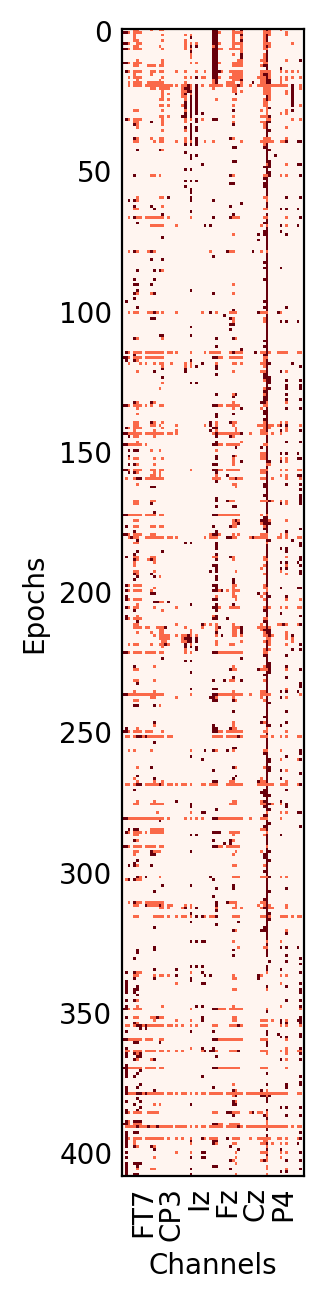

In [67]:
ylim = dict(eeg=(-15, 15))
epochs_Async.average().plot(ylim=ylim, spatial_colors=True)
epochs_Async_clean.average().plot(ylim=ylim, spatial_colors=True)
ar.get_reject_log(epochs_Async).plot()

#### Autorejection of epochs during the VFP task

In [68]:
### Long VFP
ar = AutoReject(thresh_method='bayesian_optimization')

epochs_VFPlong_clean = ar.fit_transform(epochs_VFPlong) 
reject_VFPlong = get_rejection_threshold(epochs_VFPlong_clean)

Running autoreject on ch_type=eeg

[........................................] 100.00% Creating augmented epochs |
[........................................] 100.00% Computing thresholds ... |
[........................................] 100.00% Repairing epochs |
[                                        ]   0.00% n_interp |
[........................................] 100.00% Repairing epochs |
[.............                           ]  33.33% n_interp /
[........................................] 100.00% Repairing epochs |
[..........................              ]  66.67% n_interp -
[........................................] 100.00% Repairing epochs |
[........................................] 100.00% n_interp \



Estimated consensus=0.70 and n_interpolate=32

[........................................] 100.00% Repairing epochs |Dropped 3 epochs
Estimating rejection dictionary for eeg


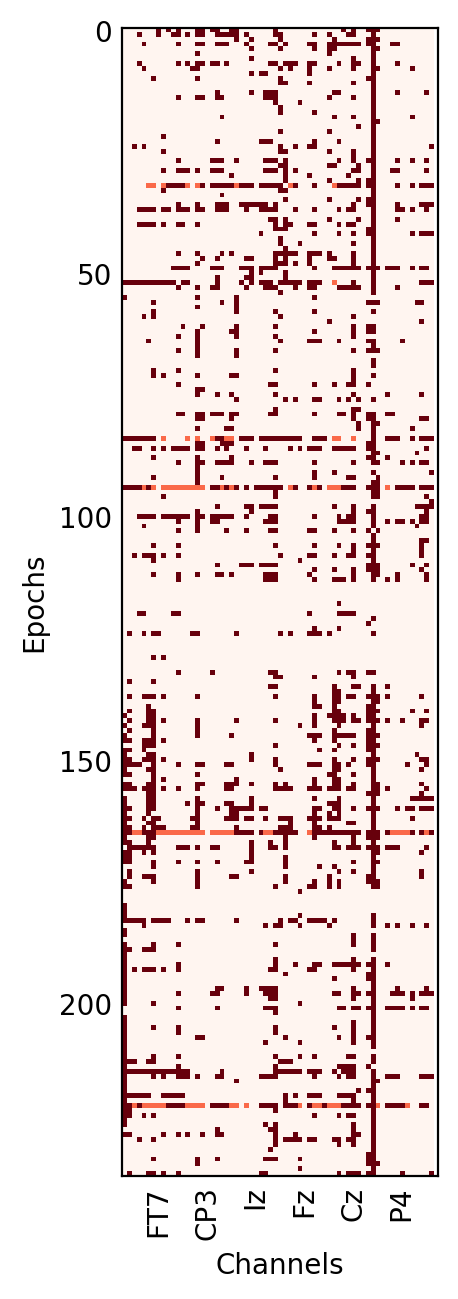

In [69]:
ylim = dict(eeg=(-10, 10))
epochs_VFPlong.average().plot(ylim=ylim, spatial_colors=True)
epochs_VFPlong_clean.average().plot(ylim=ylim, spatial_colors=True)
ar.get_reject_log(epochs_VFPlong).plot()

In [70]:
### Short VFP
ar = AutoReject(thresh_method='bayesian_optimization')

epochs_VFPshort_clean = ar.fit_transform(epochs_VFPshort) 
reject_VFPshort = get_rejection_threshold(epochs_VFPshort_clean)

Running autoreject on ch_type=eeg

[........................................] 100.00% Creating augmented epochs |
[........................................] 100.00% Computing thresholds ... |
[........................................] 100.00% Repairing epochs |
[                                        ]   0.00% n_interp |
[........................................] 100.00% Repairing epochs |
[.............                           ]  33.33% n_interp /
[........................................] 100.00% Repairing epochs |
[..........................              ]  66.67% n_interp -
[........................................] 100.00% Repairing epochs |
[........................................] 100.00% n_interp \



Estimated consensus=0.90 and n_interpolate=32

[........................................] 100.00% Repairing epochs |Dropped 4 epochs
Estimating rejection dictionary for eeg


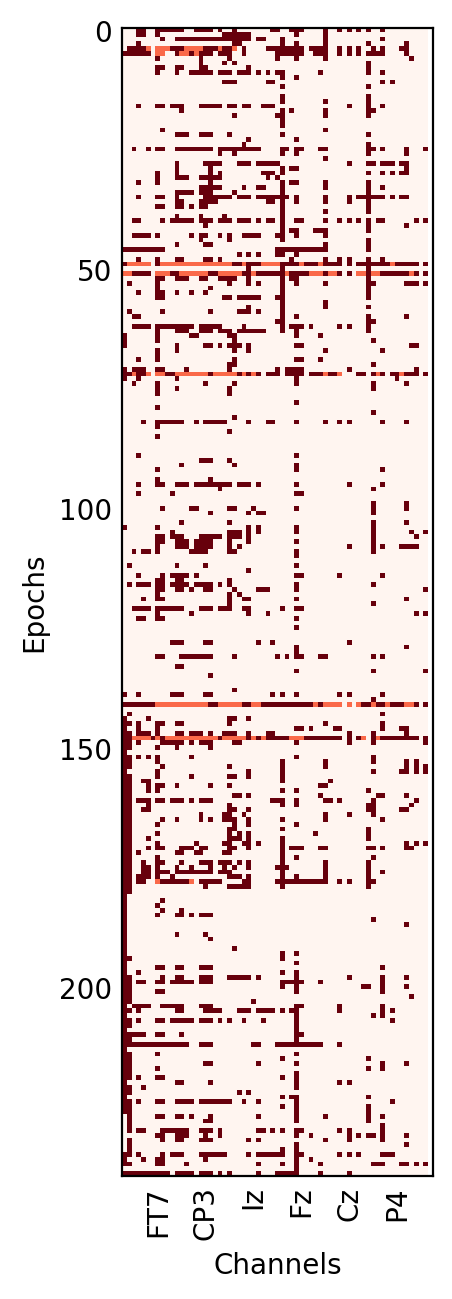

In [71]:
ylim = dict(eeg=(-10, 10))
epochs_VFPshort.average().plot(ylim=ylim, spatial_colors=True)
epochs_VFPshort_clean.average().plot(ylim=ylim, spatial_colors=True)
ar.get_reject_log(epochs_VFPshort).plot()

## To Save the epochs

In [72]:
myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/' + nameFile + '_Async-epo.fif'
epochs_Async_clean.save(myPath, overwrite=True)

myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/' + nameFile + '_VFPshort-epo.fif'
epochs_VFPshort_clean.save(myPath, overwrite=True)

myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/' + nameFile + '_VFPlong-epo.fif'
epochs_VFPlong_clean.save(myPath, overwrite=True)


In [ ]:
# Use AutoReject on base copy of Epochs
ar = AutoReject(thresh_method='bayesian_optimization')

# Detect the artifacts present in the time-window of interest
epochs_subset = epochs_Async.copy().crop(-1.1, 0.4)

epochs_Async_ar, rej_log = ar.fit_transform(epochs_subset, return_log=True)

# Apply same cleaning to other copy of epochs

epochs_Async_clean = epochs_Async.drop(rej_log.bad_epochs)
#_apply_interp(rej_log, epochs_filt, ar.threshes_, ar.picks_, ar.verbose)
    
print(epochs_subset)
print(epochs_Async_ar)
print(epochs_Async_clean)

In [ ]:

# epochs_Async_clean = epochs_Async.drop(rej_log.bad_epochs)
# apply_interp(rej_log, epochs_filt, ar.threshes_, ar.picks_, ar.verbose)

epochs_Async_clean = ar.transform(epochs_Async, reject_log=ar.reject_log)


print(epochs_subset)
print(epochs_Async_ar)
print(epochs_Async_clean)

In [ ]:
evoked_D011 = epochs['D0', 'D11'].average()
evoked_clean_D011 = epochs_Async_clean['D0', 'D11'].average()
evoked_D3366 = epochs['D33', 'D66'].average()
evoked_clean_D3366 = epochs_Async_clean['D33', 'D66'].average()

times = [-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

kwargs = dict(show=False, vmin=-5, vmax=5, time_unit='ms')

evoked_D011.plot_topomap(colorbar=True, times = times, **kwargs)
evoked_clean_D011.epochs_Async_clean(colorbar=False,  times = times, **kwargs)
evoked_D3366.epochs_Async_clean(colorbar=False,  times = times, **kwargs)
evoked_clean_D3366.plot_topomap(colorbar=False,  times = times, **kwargs)


In [ ]:
vmin, vmax = (-5,5)
times = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]

fig. axs = plt.subplots(2,1) # == nrow, ncol

axs[0].epochs['D0', 'D11', 'D33', 'D66'].average().plot_topomap(times=times, vmin=vmin, vmax=vmax)
axs[0].epochs['D0', 'D11', 'D33', 'D66'].average().plot_topomap(times=times, vmin=vmin, vmax=vmax)

# axs[0].plot(t, s1, t, s2)
# axs[0].set_xlim(0, 2)
# axs[0].set_xlabel('time')
# axs[0].set_ylabel('s1 and s2')
# axs[0].grid(True)

# cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
# axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

In [ ]:
conditions = ["Before D0", "Before D11", "Before D33", "Before D66",
              
             "After D0", "After D11", "After D33", "After D66"]

# evoked_dict = dict()

# for condition in conditions:
#     evoked_dict[condition.replace(" ", "/")] = epochs["D0", "D11", "D33", "D66"]
    
    # mne.read_evokeds(fname, baseline=(-1, 0), proj=True, condition=condition)
evoked_dict = dict()
evoked_dict = dict(epochs['D0', 'D11', 'D33', 'D66'])

#append.(epochs_clean['D0', 'D11', 'D33', 'D66'])
print(evoked_dict)

colors = dict(Before="Crimson")#, After="CornFlowerBlue")
linestyles = dict(D0='-', D11='--', D33 = '---', D66 = '----')
#pick = evoked_dict["Before/After"].ch_names.index('Oz')
pick = epochs.info["ch_names"], ["C3", "Oz", "Fz"]

mne.viz.plot_compare_evokeds(evoked_dict, colors=colors,
                             linestyles=linestyles, split_legend=True)





In [ ]:
#ar.get_reject_log(epochs_subset).plot()
picks = mne.pick_channels(epochs.info["ch_names"], ["C3", "Oz", "Fz"])

#epochs_subset[picks = ['C3', 'Oz']]
#epochs_subset.plot_image(picks='C3', sigma=1.); # raster plot of the ERP
#epochs_clean.plot_image(picks='C3', sigma=1.); # raster plot of the ERP
#print(fig1, fig2)

epochs_subset.average().plot(picks = picks, proj = 'interactive', spatial_colors = True)
epochs_clean.average().plot(picks = picks, proj = 'interactive', spatial_colors = True)

# kwargs = dict(times=1, show=False, vmin=-5, vmax=5, time_unit='s')

# fig, ax = plt.subplots(1, 2, figsize=(1, 2))
# epochs_subset.average().plot(axes=ax[0], picks = picks, spatial_colors = True)
# epochs_clean.average().plot(axes=ax[1], picks = picks, spatial_colors = True, vmin=-5, vmax=5)
# plt.show()



In [ ]:
# VFP task
epochs_subset = epochs['Nshort', 'Tshort']
epochs_clean = ar.fit_transform(epochs_subset) 
reject = get_rejection_threshold(epochs_subset) 

In [ ]:
ar.get_reject_log(epochs_subset).plot()

In [ ]:
epochs_subset = epochs['Nlong', 'Tlong']
epochs_clean = ar.fit_transform(epochs_subset) 
reject = get_rejection_threshold(epochs_subset) 

In [ ]:
ar.get_reject_log(epochs_subset).plot()

In [ ]:
print("\n---------------------\n", epochs_clean,
      "\n---------------------\n", reject)

In [ ]:
# get_reject_log(epochs).plot()
ar.get_reject_log(epochs['Tshort', 'Nshort', 'Tlong', 'Nlong']).plot()

In [ ]:
evoked = epochs.average()
evoked_clean = epochs_clean.average()

evoked.info['bads'] = ['Fpz']
evoked_clean.info['bads'] = ['Fpz']

In [ ]:
import matplotlib.pyplot as plt  # noqa

set_matplotlib_defaults(plt)

fig, axes = plt.subplots(2, 1, figsize=(6, 6))

for ax in axes:
    ax.tick_params(axis='x', which='both', bottom='off', top='off')
    ax.tick_params(axis='y', which='both', left='off', right='off')

ylim = (-10,10)
evoked.pick_types(exclude=[])
evoked.plot(exclude=[], axes=axes[0], ylim=ylim, show=False)
axes[0].set_title('Before autoreject')
evoked_clean.pick_types(exclude=[])
evoked_clean.plot(exclude=[], axes=axes[1], ylim=ylim)
axes[1].set_title('After autoreject')
plt.tight_layout()

In [ ]:
#epochs['Tshort', 'Nshort', 'Tlong', 'Nlong'].average().plot()
picks = mne.pick_channels(epochs_clean.info["ch_names"], ['Pz', 'Fz', 'Cz', 'Oz'])
epochs_clean['D0', 'D11', 'D33', 'D66'].average().plot(picks = picks, color)

### Check general signal quality with ERP inspection

In [ ]:
eog_events = events[ events[:,2] == 90 ] # Select the blink markers

onsets = eog_events[:, 0] / raw.info['sfreq']
durations = [0.1] * len(eog_events)
descriptions = ['Blink'] * len(eog_events)
blink_annot = mne.Annotations(onsets, durations, descriptions, orig_time=raw.info['meas_date'])
raw.set_annotations(blink_annot)

#raw.plot(events=eog_events)

tmin = -1.2  # start of each epoch (500ms before the trigger)
tmax = 1.4  # end of each epoch (2000ms after the trigger)
baseline = (-1.0, 0)  # means from 1000ms before to stim onset (t = 0)

epochs = mne.Epochs(raw, events, event_id = event_dict, tmin = tmin, tmax = tmax, baseline = baseline,
                    preload=True, on_missing = 'warning',
                    reject = None, reject_by_annotation=True, proj = False)




In [ ]:
# It will show us a first glande on the presence of a bad electrode
reject = dict(eeg=200e-6)  # this can be highly data- and subject-dependent
reject

epochs_clean = mne.Epochs(raw, events, event_id = event_dict, tmin = tmin, tmax = tmax, baseline = baseline,
                    preload=True, on_missing = 'warning',
                    reject = reject, reject_by_annotation=None, proj = False)

#epochs_clean.copy().drop_bad().plot_drop_log();
epochs_clean.plot_drop_log();
print(epochs.drop_log) # to see the epochs dropped


In [ ]:
epochs[-20:-10].plot(n_epochs=1, n_channels=1)

In [ ]:
#epochs.plot_drop_log()
epochs.info

### Check if a topographic interpolation of a bad electrode is needed

In [ ]:
#epochs.interpolate_bads
# bad channels are automatically interpolated after cliking over channels in epochs.plot()
epochs.plot()
epochs.interpolate_bads?
#epochs.interpolate_bads()

## Remove epochs based on the presence of a blink (event 90)

In [ ]:
len(epochs['Blink'])

In [ ]:
#epochs['Blink', 'Async'][0:100].plot()
raw.plot(events=events, event_id = event_dict)

In [ ]:

#eog_events = mne.preprocessing.find_eog_events(raw, event_id = {'Blink': 90})
eog_events = events[ events[:,2] == 90 ] # Select the blink markers

onsets = eog_events[:, 0] / raw.info['sfreq']
durations = [0.1] * len(eog_events)
descriptions = ['Blink'] * len(eog_events)
blink_annot = mne.Annotations(onsets, durations, descriptions, orig_time=raw.info['meas_date'])
raw.set_annotations(blink_annot)

raw.plot(events=eog_events)


#epochs[0:16].copy().plot()


In [ ]:
picks = mne.pick_types(raw.info, eeg=True, stim=False, exclude='bads')

# that allows rejection by hand when called in combination with a keyword ``block=True``.
# This blocks the execution of the script until the browser window is closed.
#epochs.plot(block=True)

In [ ]:
epochs.drop_bad()  # remove bad epochs based on reject

#### See the % of epochs rejected electrodes

In [ ]:
epochs.plot_drop_log();

In [ ]:
find_eog_events?

In [ ]:
## Just have a look at the averages

#epochs['Tlong'].copy().plot_image(picks=['Oz', 'C3'], sigma=1.); # raster plot of the ERP
#epochs['Nlong'].copy().plot_image(picks=['Oz', 'C3'], sigma=1.); # raster plot of the ERP



times = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs['Tlong'].copy().average().plot_topomap(times=times, proj=False, vmin=-4, vmax=4);
epochs['Nlong'].copy().average().plot_topomap(times=times, proj=False, vmin=-4, vmax=4);

evoked_Tlong = epochs['Tlong'].average()
evoked_Nlong = epochs['Nlong'].average()

contrast = mne.combine_evoked([evoked_Tlong, evoked_Nlong], [0.5, -0.5])
print(contrast)
contrast.copy().plot_topomap(times=times, proj=False, vmin=-2, vmax=2);


#epochs.copy().average().plot_topo_image()

#fig = epochs.plot(exclude=(), time_unit='s')
#fig.tight_layout()

#epochs['Tlong'].copy().average().plot_joint(times=[0, 1.2]);


In [ ]:
plt.close('all')
times = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
vmin = -2
vmax = 2

for condition in ['D0', 'D11', 'D33', 'D66']:
    epochs[condition].average().plot_topomap(times=times, vmin=vmin, vmax=vmax, title=condition);

In [ ]:
#epochs['D11'].copy().average().plot()

times = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]
#times = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


epochs['D33'].copy().filter(l_freq = 8, h_freq = 13.).average().plot_topomap(times=times, vmin=-2, vmax=2)


In [ ]:
epochs['blink'].plot(picks = ['Fpz'])

In [ ]:
epochs['blink'].average().plot(picks = ['Fpz'])

In [ ]:
epochs?

In [ ]:
evoked = epochs.average()



In [ ]:
# To pool epochs

# pool across left + right
print(epochs['auditory'])
assert len(epochs['auditory']) == (len(epochs['auditory/left']) +
                                   len(epochs['auditory/right']))
# pool across auditory + visual
print(epochs['left'])
assert len(epochs['left']) == (len(epochs['auditory/left']) +
                               len(epochs['visual/left']))

###############################################################################
# You can also pool conditions by passing multiple tags as a list. Note that
# MNE-Python will not complain if you ask for tags not present in the object,
# as long as it can find *some* match: the below example is parsed as
# (inclusive) ``'right'`` **or** ``'bottom'``, and you can see from the output
# that it selects only ``auditory/right`` and ``visual/right``.

print(epochs[['right', 'bottom']])



In [ ]:
print('Load events: \n -----------------')
events = mne.find_events(rawData, stim_channel='Status', initial_event=True, min_duration = 0.001)


# First, the VFP task; trials separated by

# SS(85) = 1
# LL(86) = 2
# SL(87) = 3
# LS(88) = 4

# Tshort(70) = 1
# Tlong(71) = 2
# Nshort(72) = 3
# Nlong(73) = 4


#%prun
# for startTrialInd, event in enumerate(events[:,2]):
#     print('Look for Start-',startTrialInd, event)
#     if event == 120: # find start of a trial
#         print(' Found Start-',startTrialInd, event)
#         for endTrialInd, repeatEvent in enumerate(events[startTrialInd+1:,2]):
#             print(' Look for End-',endTrialInd, repeatEvent)
#             if repeatEvent == 112 or repeatEvent == 113: # find a response marker
#                 print('  Found End-',endTrialInd, repeatEvent)

for indOnsetEvent, onsetEvent in enumerate(events[:, 2] ): # look at the marjers within the trial    
    #print('Look for Onset', indOnsetEvent, onsetEvent)
    
    if onsetEvent == 121: # the event to re-code
        #print('- Found Onset',indOnsetEvent, onsetEvent)
        events[indOnsetEvent,2] = 0
        
        for idx, eventCondition in enumerate(events[indOnsetEvent:, 2]):
            #print('    Look for Conditions, now at ', indOnsetEvent+idx, 'is', eventCondition, ' new code', events[indOnsetEvent, 2]) 
            if eventCondition == 85:
                events[indOnsetEvent,2] += 100 #'SS'   
            elif eventCondition == 86:
                events[indOnsetEvent,2] += 200 #'LL'
            elif eventCondition == 87:
                events[indOnsetEvent,2] += 300 #'SL'
            elif eventCondition == 88:
                events[indOnsetEvent,2] += 400 #'LS'
                
            elif eventCondition == 70:
                events[indOnsetEvent,2] += 1000 #'_Tshort'
            elif eventCondition == 71:
                events[indOnsetEvent,2] += 2000 #'_Tlong'
            elif eventCondition == 72:
                events[indOnsetEvent,2] += 3000 #'_Nshort'
            elif eventCondition == 73:
                events[indOnsetEvent,2] += 4000 #'_Nlong'
                
            elif eventCondition == 67:
                events[indOnsetEvent,2] += 9999 # training to remove
            elif eventCondition == 120 or eventCondition == 109: # beginning of the next trial is the end of the current trial
                break


In [ ]:
events = mne.find_events(rawData, stim_channel='Status', initial_event=True, min_duration = 0.001)

# First, the VFP task; trials separated by


# SS(85) = 1
# LL(86) = 2
# SL(87) = 3
# LS(88) = 4

# Tshort(70) = 1
# Tlong(71) = 2
# Nshort(72) = 3
# Nlong(73) = 4

eveOn = 0

#%prun
for startTrialInd, event in enumerate(events[:,2]):
    print('Look for Start-',startTrialInd, event)
    if event == 120: # find start of a trial
        print(' Found Start-',startTrialInd, event)
        for endTrialInd, repeatEvent in enumerate(events[startTrialInd+1:,2]):
            print(' Look for End-',endTrialInd, repeatEvent)
            if repeatEvent == 112 or repeatEvent == 113: # find a response marker
                print('  Found End-',endTrialInd, repeatEvent)
                for indOnsetEvent, onsetEvent in enumerate(events[startTrialInd:startTrialInd+endTrialInd, 2] ): # look at the marjers within the trial
                    print('     Look for Onset', indOnsetEvent, onsetEvent)
                    if onsetEvent == 121: # the event to re-code
                        print('      Found Onset-',indOnsetEvent, onsetEvent)
                        eveOn += 1
                        events[startTrialInd+indOnsetEvent,2] = 0
                        for idx, eventCondition in enumerate(events[indOnsetEvent:indOnsetEvent+endTrialInd, 2]):
                            print('      Look for Condition', idx, '-', eventCondition, '-', events[startTrialInd+indOnsetEvent,2])                            
                            if eventCondition == 85:
                                events[startTrialInd+indOnsetEvent,2] += 100 #'SS'   
                            elif eventCondition == 86:
                                events[startTrialInd+indOnsetEvent,2] += 200 #'LL'
                            elif eventCondition == 87:
                                events[startTrialInd+indOnsetEvent,2] += 300 #'SL'
                            elif eventCondition == 88:
                                events[startTrialInd+indOnsetEvent,2] += 400 #'LS'
                            elif eventCondition == 70:
                                events[startTrialInd+indOnsetEvent,2]  += 1000 #'_Tshort'
                            elif eventCondition == 71:
                                events[startTrialInd+indOnsetEvent,2]  += 2000 #'_Tlong'
                            elif eventCondition == 72:
                                events[startTrialInd+indOnsetEvent,2]  += 3000 #'_Nshort'
                            elif eventCondition == 73:
                                events[startTrialInd+indOnsetEvent,2]  += 4000 #'_Nlong'
                            elif eventCondition == 67:
                                events[startTrialInd+indOnsetEvent,2]  = 9999 # training to remove
                            
                            #print(':',events[startTrialInd+indOnsetEvent,2])
                        break
                    #else:
                         #break
                break
            #else:
                #continue
    else:
        continue
    # add elseS to avoid infinite loops
    # re-code S 121 
    
#events[1:40,]

## Create epochs of the VFP task

In [ ]:
epochs_VFP = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                          picks=picks, baseline=baseline,
                          preload=False,
                          reject=reject2)

In [ ]:
epochs.plot(n_epochs=10)
#epochs['Tlong'].copy().average().plot()

#epochs['Tlong', 'Nlong'].copy().average().plot(picks = ['Oz', 'C3'])

# mne.viz.plot_epochs_image(epochs['Tlong'], ['Oz', 'C3'], sigma=.5,
#                           vmin=-50, vmax=50,
#                           show=True)
# mne.viz.plot_epochs_image(epochs['Nlong'], ['Oz', 'C3'], sigma=.5,
#                           vmin=-50, vmax=50,
#                           show=True)

Tlong, Nlong = epochs["Tlong"].average(), epochs["Nlong"].average()

# create and plot difference ERP
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
#mne.combine_evoked([Tlong, -Nlong], weights='equal').plot_joint(**joint_kwargs)


#evoked_l_aud.plot(spatial_colors=True, gfp=True, picks='meg')




In [ ]:
epochs.copy().average().plot(proj = 'interactive', spatial_colors = True);  # interactive mode

In [ ]:
# Create subsets of events to build the different datasets

#### Asynchrony task

reference_id = 120 # start trial Async - green light turn on representing the beginning of the baseline
endTrial_id = 112  # end trial Async  - response given after red cue
_start = np.empty([1, 3], 'int') # When a trial start
_finish = np.empty([1, 3], 'int') # and when it finishes

# need to transform into np.array _start_finish

# Set the list of events that will be used to build the epochs for each condition
events_Tshort_SS = [[],[],[]]
events_Tshort_LL = [[],[],[]]
events_Tshort_SL = [[],[],[]]
events_Tshort_LS = [[],[],[]]

events_Tlong_SS = [[],[],[]]
events_Tlong_LL = [[],[],[]]
events_Tlong_SL = [[],[],[]]
events_Tlong_LS = [[],[],[]]

events_Nshort_SS = [[],[],[]]
events_Nshort_LL = [[],[],[]]
events_Nshort_SL = [[],[],[]]
events_Nshort_LS = [[],[],[]]

events_Nlong_SS = [[],[],[]]
events_Nlong_LL = [[],[],[]]
events_Nlong_SL = [[],[],[]]
events_Nlong_LS = [[],[],[]]

# Create a list of lists

# ------------------------------

index = 0
subIndex = 0
# Create an array of start and finish sample of each trial
for sample, offset, marker in events:   # the three values per row
    if marker == 120 or marker == 66: # start of the trial is represented by 120 or 66
        print(index, '---start', sample, offset, marker)

        # loop within a trial
        for sSample, sOffset, sMarker in events[index+1:,:]: # from the sample of the start trial to the end
        
            #print(events[sample:], '- sSample:', sSample)
            subIndex += 1
            if sMarker == endTrial_id: # a valid trial
                
                _start  = np.append(_start, [[sample, offset, marker]], axis = 0)
                _finish = np.append(_finish, [[sSample, sOffset, sMarker]], axis = 0)
                print(subIndex, '--- finish', sSample, sOffset, sMarker)
                subIndex = 0
                break
                
            elif sMarker == reference_id:
                print(subIndex, '  --- invalid', sSample, sOffset, sMarker)
                subIndex = 0
                break
    else:
        #print(index, 'no')
        index += 1

        
                
# Then, go through each to-be epochs and categorize them given the conditions of interest

            # detect marker in the apparition order
            # is there a function is() or find()? So I can nested the presence of markers to build events array
        
            #if marker == 70:   
                #for
                #if marker == 85:
                 #   events_Tshort_SS.append([sSample, 0, sMarker])   
            #elif marker == reference_id:
             #   break
                
# I could also 're-code' the events so it would fits the original MNE format of nested markers
# as a string code, eg. VFP/Tshort/SS or 111 in dict()
    
    
print("------")
        
#print(len(_start)) # number of column
print('nRow Start:', len(_start)) # number of rows
print('nRow Finish:', len(_finish)) # number of rows

print("------")
#print(_start)
#print(events_Tshort_SS)

#print(type(_start))

#print(_start[:4,])
#print("------")
#print(_finish[:4,])



In [ ]:
#A= np.empty([1, 3], 'int')

#np.append(A, [[2, 0, 5]], axis=0)

_start, _ = define_target_events(events, 120, 120,
                                    sfreq, tmin, tmax)
_finish, _ = define_target_events(events, 112, 120,
                                    sfreq, tmin, tmax)

print(len(_start))
print(len(_finish))
print("------")

print(_start[:4,])
print("------")
print(_finish[:4,])


In [ ]:
#events
# Create a subset of events to build the different datasets


reference_id = 120  # start trial Async - green light turn on representing the beginning of the baseline
target_endTrial = 112  # end trial Async  - response given after red cue

sfreq = rawData.info['sfreq']  # sampling rate
tmin = 0  # time to start looking for the target_id event
tmax = 10e4  # time to stop looking for the target_id event

# new_id_boj = 170  # the new event id for a hit. If None, reference_id is used.


aTrial, timeFinish = define_target_events(events, reference_id, target_endTrial,
                                    sfreq, tmin, tmax)


#print(len(aTrial))
#print(aTrial[:,0]) # select all rows and column 0

#print(time)
print('Total Start:', len(aTrial[:5,0]), '- Total finish:',  len( (aTrial[:5,0] + timeFinish[:5] )*sfreq) )

print([aTrial[:5,0], timeFinish[:5]])
print("-------")
print('Start:', aTrial[:5,0])
print('Finish:',  [aTrial[:5,0], timeFinish[:5], timeFinish[:5]*sfreq] )
#print(events[0:10])
#mne.find_events?

#epochs_AsyncTask = mne.Epochs(rawData, events=events, tmin = tmin, tmax=tmax,
#                    event_id={"aTrial": 120}, baseline = (0, 0))


#epochs_TShort.copy().average().plot_topomap(times=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], ch_type='eeg')
#epochs_Sync.copy().average().plot(proj = False, spatial_colors = True);  # interactive mode

#epochs_AsyncTask?
#epochs_AsyncTask.events[:5]


In [ ]:
fig = mne.viz.plot_events(events, sfreq=rawData.info['sfreq'],
                          event_id=event_dict)
rawData.plot(event_id=event_dict, events=events)

#### Set time-window parameters of the epochs

In [ ]:
tmin = -0.1  # start of each epoch (500ms before the trigger)
tmax = 4.0  # end of each epoch (2000ms after the trigger)
baseline = (0, 0)  # means from 200ms before to stim onset (t = 0)

### Create dataset of epochs per condition within the VFP task

In [ ]:
# VFP Task: create the set of epochs depending on the conditions
reference_id = 121  # start VFP
target_id_TShort = 70  # when condition is Temporal with Short VFP
target_id_TLong = 71  # when condition is Temporal with Short VFP
target_id_NShort = 72  # when condition is Temporal with Short VFP
target_id_NLong = 73  # when condition is Temporal with Short VFP

sfreq = rawData.info['sfreq']  # sampling rate
tmin = 0  # time to start looking for the target_id event
tmax = 2  # time to stop looking for the target_id event

new_id_TShort = 170  # the new event id for a hit. If None, reference_id is used.
new_id_TLong = 171  
new_id_NShort = 172 
new_id_NLong = 173  

event_id = {
    'greyOn_TShort': 170,
    'greyOn_TLong': 171,
    'greyOn_NShort': 172,
    'greyOn_NLong': 173,
}

events_TShort, VFP= define_target_events(events, reference_id, target_id_TShort,
                                    sfreq, tmin, tmax, new_id_TShort)
events_TLong, VFP= define_target_events(events, reference_id, target_id_TLong,
                                    sfreq, tmin, tmax, new_id_TLong)
events_NShort, VFP= define_target_events(events, reference_id, target_id_NShort,
                                    sfreq, tmin, tmax, new_id_NShort)
events_NLong, VFP= define_target_events(events, reference_id, target_id_NLong,
                                    sfreq, tmin, tmax, new_id_NLong)







##### Create the epochs 

In [ ]:
# All epochs task/condition confounded
raw = mne.io.read_raw_bdf(myPath, montage = 'deprecated', preload=True)
epochs = mne.Epochs(rawData, events, event_id, 0, 0.2)
 


In [ ]:


#epochs = mne.Epochs(rawData, events_TShort, event_id, 0, 0.2, baseline=(None, 0))

tmin = -1.2  # start of each epoch (500ms before the trigger)
tmax = 1.2  # end of each epoch (2000ms after the trigger)
baseline = (-1.0, 0)  # means from 200ms before to stim onset (t = 0)

epochs_TShort = mne.Epochs(rawData, events=events_TShort, tmin = tmin, tmax=tmax,
                    event_id={"greyOn_TShort": 170}, baseline = baseline)
epochs_TLong = mne.Epochs(rawData, events=events_TLong, tmin = tmin, tmax=tmax,
                    event_id={"greyOn_TLong": 171}, baseline = baseline)
epochs_NShort = mne.Epochs(rawData, events=events_NShort, tmin = tmin, tmax=tmax,
                    event_id={"greyOn_NShort": 172}, baseline = baseline)
epochs_NLong = mne.Epochs(rawData, events=events_NLong, tmin = tmin, tmax=tmax,
                    event_id={"greyOn_NLong": 173}, baseline = baseline)

In [ ]:
epochs.load_data()  # load data in memory

In [ ]:
epochs_TShort.plot(events=events) 

In [ ]:
epochs_TShort.info

In [ ]:
epochs_TShort.copy().average().plot(proj = False, spatial_colors = True);  # interactive mode

In [ ]:
define_target_events?

In [ ]:
# Visualization

vmin, vmax = (-5,5)
times = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]
epochs_TShort.copy().average().plot_topomap(times=times, ch_type='eeg', vmin=vmin, vmax=vmax)
epochs_TLong.copy().average().plot_topomap(times=times, ch_type='eeg', vmin=vmin, vmax=vmax)
epochs_NShort.copy().average().plot_topomap(times=times, ch_type='eeg', vmin=vmin, vmax=vmax)
epochs_NLong.copy().average().plot_topomap(times=times, ch_type='eeg', vmin=vmin, vmax=vmax)


### Create dataset of epochs per condition within the Async task

In [ ]:
# Async Task: create the set of epochs depending on the conditions
reference_id = 105  # Cue turned off and wait for stimuli
target_id_Sync = 74  # when condition is Stimuli Synchrone
target_id_Async11 = 75  # when condition is Stimuli Asynchrone at 11 ms
target_id_Async33 = 76  # when condition is Stimuli Asynchrone at 33 ms
target_id_Async66 = 77  # when condition is Stimuli Asynchrone at 66 ms

sfreq = rawData.info['sfreq']  # sampling rate
tmin = 0  # time to start looking for the target_id event
tmax = 1  # time to stop looking for the target_id event

new_id_Sync = 174  # the new event id for a hit. If None, reference_id is used.
new_id_Async11 = 175
new_id_Async33 = 176 
new_id_Async66 = 177  


events_Sync, VFP= define_target_events(events, reference_id, target_id_Sync,
                                    sfreq, tmin, tmax, new_id_Sync)

events_Async11, VFP= define_target_events(events, reference_id, target_id_Async11,
                                    sfreq, tmin, tmax, new_id_Async11)

events_Async33, VFP= define_target_events(events, reference_id, target_id_Async33,
                                    sfreq, tmin, tmax, new_id_Async33)

events_Async66, VFP= define_target_events(events, reference_id, target_id_Async66,
                                    sfreq, tmin, tmax, new_id_Async66)

print(VFP)

#### Create the epochs

In [ ]:
tmin = -1.2  # start of each epoch (500ms before the trigger)
tmax = 4  # end of each epoch (2000ms after the trigger)
baseline = (-1.0, 0)  # means from 200ms before to stim onset (t = 0)

epochs_Sync = mne.Epochs(rawData, events=events_Sync, tmin = tmin, tmax=tmax,
                    event_id={"Sync": 174}, baseline = baseline)
epochs_Async11 = mne.Epochs(rawData, events=events_Async11, tmin = tmin, tmax=tmax,
                    event_id={"Async11": 175}, baseline = baseline)
epochs_Async33 = mne.Epochs(rawData, events=events_Async33, tmin = tmin, tmax=tmax,
                    event_id={"Async33": 176}, baseline = baseline)
epochs_Async66 = mne.Epochs(rawData, events=events_Async66, tmin = tmin, tmax=tmax,
                    event_id={"Async66": 177}, baseline = baseline)

In [ ]:
epochs_Sync.plot_psd(fmax=40); # see Frequencies

In [ ]:
epochs_Sync.plot_image(picks='Oz', sigma=1.); # raster plot of the ERP

In [ ]:
epochs_Sync.copy().average().plot(proj = False, spatial_colors = True);  # interactive mode

In [ ]:
events_TShort = mne.find_events(epochs_TShort, stim_channel='Status')
#print(events_TShort[:5]) 

In [ ]:
#mne.io.pick.channel_type(rawData.info, 63)  # channel type from 0 to 63 == 'eeg'
#rawData.info['chs'][0]


In [ ]:
#epochs.plot(); # All the epochs/trials -- if click on epoch (become red) and close the window, epoch removed

In [ ]:
epochs.metadata



In [ ]:
mne.pick_types?

In [ ]:
epochs_Tshort.copy().average().plot(proj = False, spatial_colors = True);  # interactive mode

In [ ]:
epochs_Tshort.pick_types(stim = True)

In [ ]:
events_Tshort = mne.find_events(epochs_Tshort, stim_channel='STIM', initial_event=False, min_duration = 0.005)

In [ ]:
#print(events[indOnsetEvent,2])
print('-----------------------------------------------------------------------')
a,b = np.unique(mne.find_events(rawData, stim_channel='Status', initial_event=True, min_duration = 0.001)[:, 2], return_counts=True)
print('---')
print(a[0:21])
print('---')
print(b[0:21])

print('-----------------------------------------------------------------------')
a,b = np.unique(events[:, 2], return_counts=True)
print('---')
print(a)
print('---')
print(b)

#events[1:50,]
# print(startTrialInd)
# print(endTrialInd)
# print('-----')
# for indOnsetEvent, onsetEvent in enumerate(events[range(startTrialInd, endTrialInd), 2] ): # look at the marjers within the trial
#     print(indOnsetEvent, onsetEvent)


In [ ]:
fig = mne.viz.plot_events(events_Tshort, epochs_Tshort.info['sfreq']);

In [ ]:
tmin_ = -0.2
tmax_ = 0.4
event_id = dict(TShort=new_id_TShort,TLong=new_id_TLong,
                NShort=new_id_NShort,NLong=new_id_NLong
               )

#epochs = mne.Epochs(rawData, events_, event_id, tmin_,
#                    tmax_, picks=picks, baseline=(None, 0),
#                    reject=reject)

# average epochs and get an Evoked dataset.

#TShort, TLong, NShort, NLong= [epochs[k].average() for k in event_id]

###############################################################################
# View evoked response

times = 1e3 * epochs.times  # time in milliseconds
title = 'Title'

fig, axes = plt.subplots(2, 1)
epochs.plot(axes=axes[0], time_unit='s')
axes[0].set(title=title % 'late', ylabel='ERP')
#late.plot(axes=axes[1], time_unit='s')
#axes[1].set(title=title % 'early', ylabel='ERP')
plt.show()

In [ ]:
mne.realign_epochs?

In [ ]:
# Alternative for Async Task

events = mne.find_events(rawData, stim_channel='Status', initial_event=False, min_duration = 0.005)
delay = int(round(0.03 * rawData.info['sfreq']))
events[:, 0] = events[:, 0] + delay

epochs = mne.Epochs(rawData, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline,
                    reject=reject)

rawData.copy().average().plot(event_id=event_id, events=events);

In [ ]:
events[10000:10020]

In [ ]:
# Concerning the VFP
for anEvent in events:

    if anEvent[2] == 66:  # in 66 (startTrial)
        # find andEvent[2] == 40 (End Trial)
        #print (anEvent[0]) # print its index sample




In [ ]:
events[0][:]

In [ ]:
events

In [ ]:
myArray = np.array([[1,2,5], [1,2,3]])
myArray

In [ ]:
name = 'Alice'
age = 13

if name == 'Alice':
    print('Hi, Alice.')
    else if age < 12:
    print('You are not Alice, kiddo.')

In [ ]:
n = 10
sequence = [0,1]
for i in range(2,n): # This is going to be a problem if we ever set n <= 2!
    sequence.append(sequence[i-2] + sequence[i-1])
    #sequence.append(sequence[i-1]+sequence[i-2])
print(sequence)

In [ ]:
ind = 0
for event in events:
    ind = ind + 1
    print('event',ind,':' , event[0], event[2])

In [ ]:
epochs_subset.average().plot(ylim=(-4,4), spatial_colors=True)
epochs_clean.average().plot(ylim=(-4,4), spatial_colors=True)

